### Step 4: Exploratory data analysis <a name="step_4"></a>

#### Import files & libraries <a name="step_4_1"></a>

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# try-except blocks handle errors that occur from changing file directories

try:
    company = pd.read_csv('project_sql_result_01.csv')
except:
    company = pd.read_csv('/datasets/project_sql_result_01.csv')

try:
    dropoff = pd.read_csv('project_sql_result_04.csv')
except:
    dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')

try:
    loop_to_ohare = pd.read_csv('project_sql_result_07.csv')
except:
    loop_to_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')
    

#### Study general information <a name="step_4_2"></a>

In [3]:
# print head for the new 'company' DataFrame

company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
# print head for the new 'dropoff' DataFrame

dropoff.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [5]:
# print some descriptive statistics for 'company'

company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [6]:
# print some descriptive statistics for 'dropoff'

dropoff.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [7]:
# print general information for 'company'

company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [8]:
# print general information for 'dropoff'

dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


#### Check for duplicates <a name="step_4_3"></a>

In [9]:
# check both new DataFrames for duplicates

print("Number of duplicates in the 'company' DataFrame: {}".format(company.duplicated().sum()))
print("Number of duplicates in the 'dropoff' DataFrame: {}".format(dropoff.duplicated().sum()))

Number of duplicates in the 'company' DataFrame: 0
Number of duplicates in the 'dropoff' DataFrame: 0


#### Changing data types <a name="step_4_4"></a>
For large data sets with limited memory resources, it's a good idea to change data types when appropriate. Here, we will change the 'trips_amount' column in the 'company' DataFrame from *float* to *int16* to save memory.

In [10]:
# change 'trips_amount' from float to int16

company['trips_amount'] = company['trips_amount'].astype('int16')

##### Conclusion <a name="step_4_4_1"></a>

After our initial assessment of the data, we can say the following:
- There are no missing values that need to be filled
- There are no duplicates
- We can save memory by changing floats to int16 where appropriate

#### Identify top 10 neighborhoods by drop-offs <a name="step_4_3"></a>

In [11]:
# print first 10 rows of 'dropoff' DataFrame sorted by average trips

top_10_dropoff = dropoff.sort_values('average_trips', ascending=False).head(10)
top_10_dropoff

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


#### Plot company vs Number of trips  <a name="step_4_4"></a>

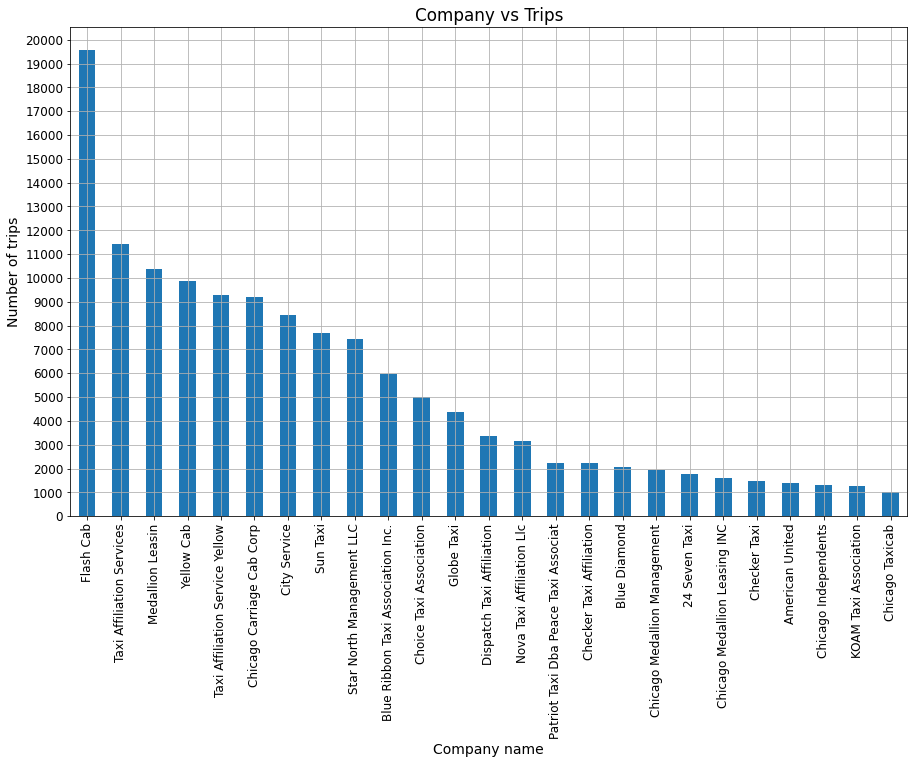

In [12]:
# filter for companies with over 1000 trips & plot

company_high_trips = company.query('trips_amount > 1000')

plt.rcParams.update({'font.size': 14})

ax = company_high_trips.plot(kind='bar',
                             x='company_name',
                             y='trips_amount',
                             figsize=(15, 9),
                             title='Company vs Trips',
                             fontsize=12,
                             grid=True,
                             yticks=range(0, 21000, 1000),
                             legend=False)

ax.set_xlabel('Company name')
ax.set_ylabel('Number of trips')
                       
plt.show()

##### Conclusion  <a name="step_4_4_1"></a>
Flash Cab seems to be the dominant taxi company out of all of the companies in our data set. They get the most business, with nearly twice as many trips as the runner-up, Taxi Affiliation Services.

There is a long tail of companies that get less than 3000 trips. Maybe we could classify these as 'lower-tier' companies while those with greater than 3000 trips could be classified as 'upper-tier' companies. If we were doing some type of business analysis on these companies, perhaps it would make sense to focus on the upper-tier companies since they get the majority of the business in this industry.

#### Plot top 10 neighborhoods by drop-off count <a name="step_4_5"></a>

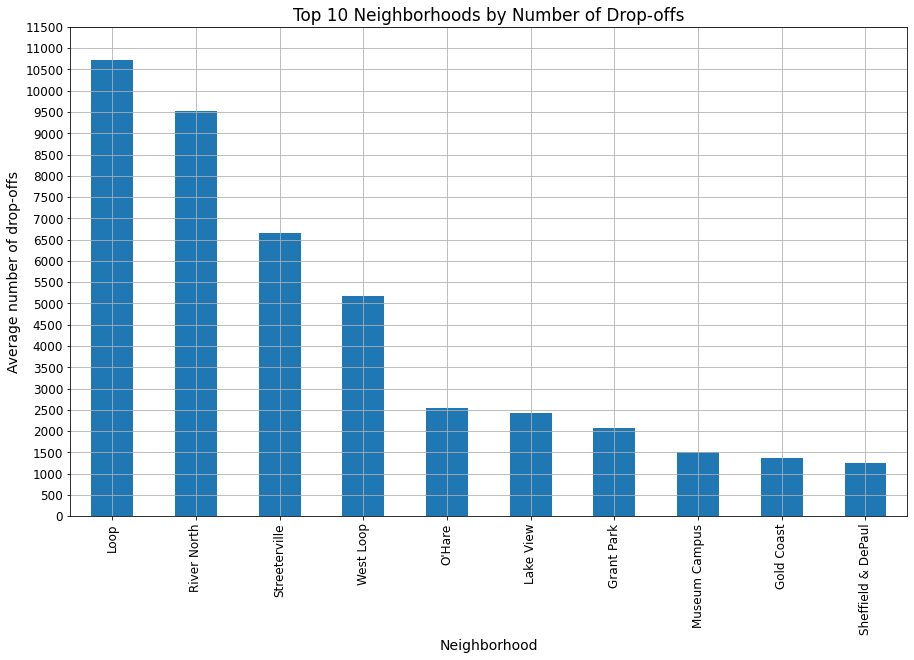

In [13]:
# plot DataFrame from previous step

ax = top_10_dropoff.plot(kind='bar',
                         x='dropoff_location_name',
                         y='average_trips',
                         figsize=(15, 9),
                         title='Top 10 Neighborhoods by Number of Drop-offs',
                         fontsize=12,
                         grid=True,
                         yticks=range(0, 12000, 500),
                         legend=False)

ax.set_xlabel('Neighborhood')
ax.set_ylabel('Average number of drop-offs')

plt.show()

##### Conclusion <a name="step_4_5_1"></a>
Most customers booking a taxi go to Loop, River North, Streeterville, and West Loop. We can't be certain why this is. Perhaps it's because these places are home to the cities entertainment and nightlife districts, or it could be that they're simply the most populous. We'll need more information in order to formulate and test a hypothesis.

### Step 5: Testing hypotheses <a name="step_5"></a>
Next, we'll test the hypothesis:

    "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

But first, we need to check the new 'loop_to_ohare' DataFrame for missing values, dupicates, and optimal data types.

#### Study general info for 'loop_to_ohare' DataFrame <a name="step_5_1"></a>

In [14]:
# print head for'loop_to_ohare'

loop_to_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [15]:
# print some descriptive statistics for 'loop_to_ohare'

loop_to_ohare.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [16]:
# print general information for 'loop_to_ohare'

loop_to_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


#### Check for duplicates <a name="step_5_2"></a>

In [17]:
# check both new 'loop_to_ohare' DataFrame for duplicates

print("Number of duplicates in the 'loop_to_ohare' DataFrame: {}".format(loop_to_ohare.duplicated().sum()))

Number of duplicates in the 'loop_to_ohare' DataFrame: 197


In [18]:
# print duplicate rows

loop_to_ohare[loop_to_ohare.duplicated()].head(10)

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
125,2017-11-11 08:00:00,Good,1380.0
126,2017-11-11 09:00:00,Good,1380.0
130,2017-11-11 10:00:00,Good,1260.0
179,2017-11-11 06:00:00,Good,1260.0
190,2017-11-04 08:00:00,Good,1323.0


There are 197 duplicates in the 'loop_to_ohare' DataFrame. It appears as if they're all in the 'duration_seconds' column. Since these are representing the amount of time it took to drive between two areas, it makes sense that it would take the same amount of time for some of these trips. This data should therefore be left alone.

#### Changing data types <a name="step_5_3"></a>

We can see again that 'duration_seconds' is a *float* when it could be set as *int16* to save memory. Let's do that now.

In [19]:
# change 'duration_seconds' to int16

loop_to_ohare['duration_seconds'] = loop_to_ohare['duration_seconds'].astype('int16')

##### Conclusion <a name="step_5_3_1"></a>

After our initial assessment of the data, we can say the following:
- There are no missing values that need to be filled
- There were duplicates, but they were not due to an error and can be kept in the data set
- We can save memory by changing floats to int16 where appropriate

#### Finding averages & variances <a name="step_5_4"></a>

In [20]:
# filter for rainy Saturday trips
loop_to_ohare_rainy = loop_to_ohare.query('weather_conditions == "Bad"')
loop_to_ohare_sats = loop_to_ohare_rainy['start_ts'].str.contains('2017-11-04|2017-11-11|2017-11-18|2017-11-25')
loop_to_ohare_rainy_sats = loop_to_ohare_rainy[loop_to_ohare_sats]

# average & variance for duration times on rainy Saturdays
loop_to_ohare_rainy_sats_avg = loop_to_ohare_rainy_sats['duration_seconds'].mean()
loop_to_ohare_rainy_sats_var = loop_to_ohare_rainy_sats['duration_seconds'].var()

# filter for all other trips
loop_to_ohare_all_others = loop_to_ohare[~loop_to_ohare.index.isin(loop_to_ohare_rainy_sats.index)]

# average & variance for duration times on all other days
loop_to_ohare_all_avg = loop_to_ohare_all_others['duration_seconds'].mean()
loop_to_ohare_all_var = loop_to_ohare_all_others['duration_seconds'].var()

print('Rainy Saturday trip durations, average: {:.2f}'.format(loop_to_ohare_rainy_sats_avg))
print('Rainy Saturday trip durations, variance: {:.2f}\n'.format(loop_to_ohare_rainy_sats_var))

print('All other trip durations, average: {:.2f}'.format(loop_to_ohare_all_avg))
print('All other trip durations, variance: {:.2f}'.format(loop_to_ohare_all_var))

Rainy Saturday trip durations, average: 2427.21
Rainy Saturday trip durations, variance: 520294.09

All other trip durations, average: 1999.68
All other trip durations, variance: 576382.01


#### Forming the null & alternative hypotheses <a name="step_5_5"></a>
After calculating means and variances for trips taken on rainy Saturdays and for all other trips, we can form the null hypothesis. It appears that **the average trip duration for rainy Saturdays is significantly higher than the average duration for all other days**. This is our null hypothesis.

The alternative hypothesis is that this is due to randoness and **the averages are actually not different from each other**. To determine whether or not this difference is due to randomness or not, we can perform a p-test. Variances between the two data sets are pretty close, so for our p-test, we can assume equal variance.

For our alpha value (critical statistical significance level) we **can choose 0.05**. This means **we can be 95% confident** that our analysis is correct.

#### Run the P-test <a name="step_5_6"></a>

In [21]:
# run p-test

results = st.ttest_ind(loop_to_ohare_rainy_sats['duration_seconds'], loop_to_ohare_all_others['duration_seconds'], equal_var=True)

alpha = 0.05

print('Null hypothesis:\n   The average duration of rides from the Loop to O\'Hare International Airport changes on rainy Saturdays.\n')
print('Alternative hypothesis:\n   The average duration of rides from the Loop to O\'Hare International Airport remains the same on rainy Saturdays.\n')
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Null hypothesis:
   The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

Alternative hypothesis:
   The average duration of rides from the Loop to O'Hare International Airport remains the same on rainy Saturdays.

p-value:  6.517970327099473e-12
We reject the null hypothesis


##### Conclusion <a name="step_5_6_1"></a>
The p-value for our p-test fell well below our critical statistical significance value of 0.05, meaning we can reject the null hypothesis in favor of the alternative hypothesis. This means that the difference in average trip durations as calculated previously is due to randomness, and in reality they are not statistically different.

### Step 6: General Conclusion <a name="step_6"></a>

From a business standpoint, we can do a few things based on the data that will result in higher revenues. Our main competition is Flash Cab. They're the leader in terms of number of trips and we should focus on providing more value to customers than they currently do. Of course, this will require more data and research to achieve detailed action items.

The top neighborhoods are Loop, River North, Streeterville, and West Loop. These are all closely grouped together and represent the most populous areas. Perhaps it would be a good idea to focus drivers and resources into these areas.

A large number of rides end in O'Hare, which is where Chicago's largest airport was built. This massive airport is the 6th-busiest in the world and served 83 million passengers in 2018. It makes sense that many of these rides also originate in the Loop, the main business district in Chicago.

From our p-test, we determined that rides from Loop to O'Hare on rainy Saturdays are not statistically longer in duration than rides on all other days. It could be because Satudays have much less traffic than weekdays, which lessens the ride duration. Rain and bad weather is expected to slow rides down, so perhaps this combination evens things out. In this case, we don't need to alter our business strategy for these days.